In [2]:
%pylab inline
from pandas import *
from scipy.ndimage.filters import gaussian_filter1d
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [6]:
def find_bifurcation_index(y_array):
      
    bifurcation_index = 0
    
    for i in range (n_points-2):
        delta_h1 = y_array[i+1]-y_array[i]
        delta_h2 = y_array[i+2]-y_array[i+1]
        if (delta_h1<0 and delta_h2>0):
            bifurcation_index = i+1
    
    return bifurcation_index  

In [7]:
def gaussian(x, a, b, c):
    val = a * exp(-(x - b)**2 / c**2)
    return val

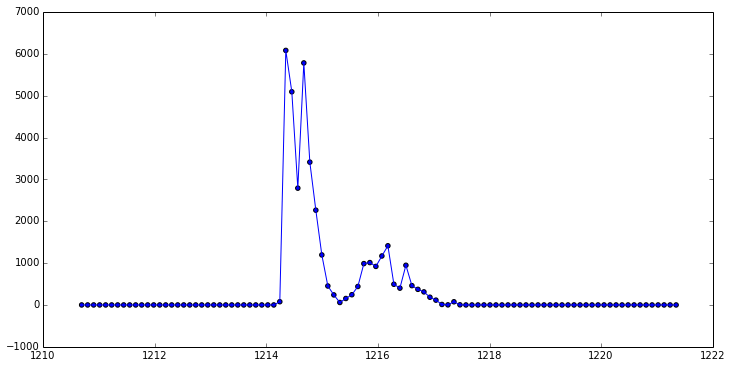

In [49]:
#prueba = gal_logt8_v0_a0out_lognH20.0_v100.0_logZ-4.0.dat
data = loadtxt('prueba.dat').T

x = data[0]
y = data[1]

n_points = len(x)

fig = figure(figsize=(12,6))
plot(x,y)
scatter(x,y)

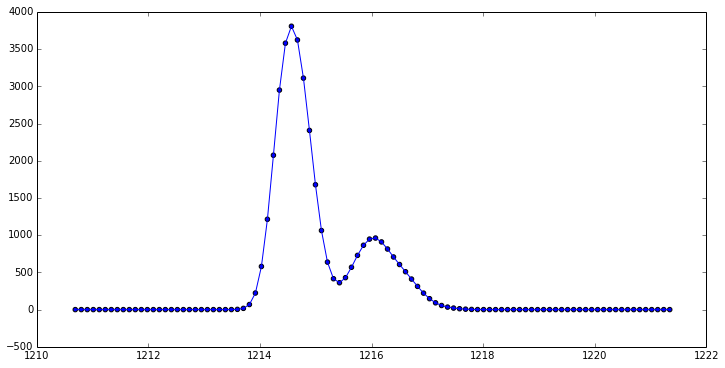

In [50]:
y_gaussian=gaussian_filter1d(y,2)

fig = figure(figsize=(12,6))
scatter(x,y_gaussian)
plot(x,y_gaussian)

In [52]:
find_bifurcation_index(y_gaussian)

44

In [53]:
print y_gaussian[44]

360.7767716


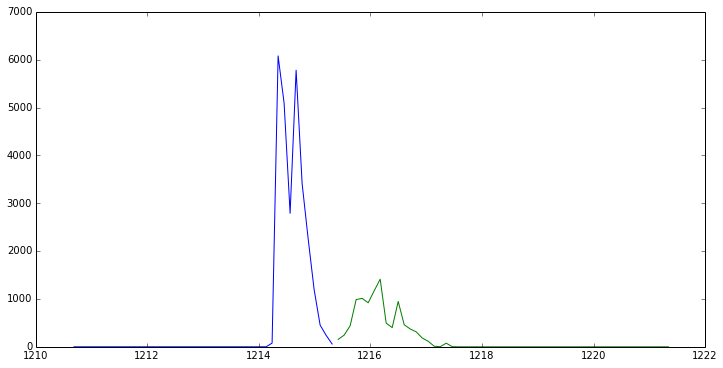

In [58]:
#Curve 1
x1 = x[0:44]
y1 = y[0:44]

#Curve 2
x2 = x[44:n_points]
y2 = y[44:n_points]

fig = figure(figsize=(12,6))
plot(x1,y1)
plot(x2,y2)

In [116]:
#Curve 1
p1 = [6000, 1214.5, 0.2]
popt1, pcov1 = curve_fit(gaussian, x1, y1, p0=p1)
sigma1 = popt1[2]

#Curve 2
p2 = [1400,1216.2,0.5]
popt2, pcov2 = curve_fit(gaussian, x2, y2, p0=p2)
sigma2 = popt2[2]

In [117]:
print sigma1, sigma2

0.333588469329 0.557810483235


In [118]:
sigma = sigma2/sigma1

In [119]:
print sigma

1.67215157153


In [8]:
#Importing dataframe

df = read_csv('./data/galaxyoutflow.csv')

v_gal = df['v_gal']
v_out = df['v_out']
lognh = df['lognh']

In [9]:
galaxy_velocities = [0, 20, 100, 200] #(km/s)
outflow_velocities = [100, 200, 300, 400, 500] #(km/s)
outflow_lognHs = [20.0, 20.0625, 20.125, 20.1875, 20.25, 20.3125, 20.375, 20.4375, 20.5, 20.5625, 20.625, 20.6875,
                  20.75, 20.8125, 20.875, 20.9375, 21.0, 21.0625, 21.125, 21.1875, 21.25, 21.3125, 21.375, 21.4375,
                  21.5, 21.5625, 21.625, 21.6875, 21.75, 21.8125, 21.875, 21.9375, 22.0, 22.0625, 22.125, 22.1875,
                  22.25, 22.3125, 22.375, 22.4375, 22.5]

In [10]:
#New dataframe to write results

peaks_file = open("./data/peaks_information.csv",'w')
peaks_file.write("v_gal,v_out,lognh,sigma,number_peaks\n")

In [11]:
for gal_vel in galaxy_velocities:    
    for out_vel in outflow_velocities:
        for out_log in outflow_lognHs:
            
            df_sub = df[(v_gal==gal_vel) & (v_out==out_vel) & (lognh==out_log)]
            
            x = df_sub['x']
            y = df_sub['y']
            
            n_points = len(x)
            y_gaussian = gaussian_filter1d(y,2)
            bif_index = find_bifurcation_index(y_gaussian)
            
            if(bif_index != 0):
                
                num_peaks = 2
                
                #Curve 1
                x1 = x[0:bif_index]
                y1 = y[0:bif_index]
            
                p1 = [6000, 1214.5, 0.2]
                popt1, pcov1 = curve_fit(gaussian, x1, y1, p0=p1)
                sigma1 = popt1[2]

                #Curve 2
                x2 = x[bif_index:n_points]
                y2 = y[bif_index:n_points]
            
                p2 = [1400,1216.2,0.5]
                popt2, pcov2 = curve_fit(gaussian, x2, y2, p0=p2)
                sigma2 = popt2[2]
            
                sigma = sigma2/sigma1
                
            else:
                num_peaks = 1
                sigma = 0
            
            peaks_file.write(str(gal_vel)+","+str(out_vel)+","+str(out_log)+","+str(sigma)+","+str(num_peaks)+"\n")

/usr/local/lib/python2.7/dist-packages/scipy/optimize/minpack.py:604: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [12]:
peaks_file.close()